In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

**Предметная область:** Продажи видеоигр. Набор данных содержит информацию о продажах игр за несколько лет, для разных регионов и платформ.

**Источник данных:** https://www.kaggle.com/

**Характер данных:** Данный набор представляет собой обширный список игр, с информацией о них и рейтингом популярности. Имеем как текстовые данные, так и числовые.



1.	Rank – рейтинг продаж (топ продажи игр)
2.	Name – Название игры
3.	Platform – Игровая платформа (Такие как PS2 или NES)
4.	Year – год выпуска игры
5.	Genre - жанр
6.	Publisher - издатель
7.	na_sales – продажи в Северной Америке (по продажам имеется в виду среднее число за какой-то период, который в датасете не был указан)
8.	eu_sales – продажи в Европе
9.	jp_sales – продажи в Японии
10.	other_sales – продажи в других областях
11.	global_sales – глобальные продажи

In [10]:
df = pd.read_csv('D:/video_games_sales.csv')
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


 **Сандарное отклонение (СКО):**

In [12]:
df[[ 'rank', 'year', 'na_sales','eu_sales','jp_sales', 'na_sales','eu_sales','jp_sales', 'other_sales','global_sales']].std( ) # вычислить стандартное отклонение нескольких столбцов

rank            4791.853933
year               5.828981
na_sales           0.816683
eu_sales           0.505351
jp_sales           0.309291
na_sales           0.816683
eu_sales           0.505351
jp_sales           0.309291
other_sales        0.188588
global_sales       1.555028
dtype: float64

**Гистограмма распределения значений. Объем выпущенных игр по годам**

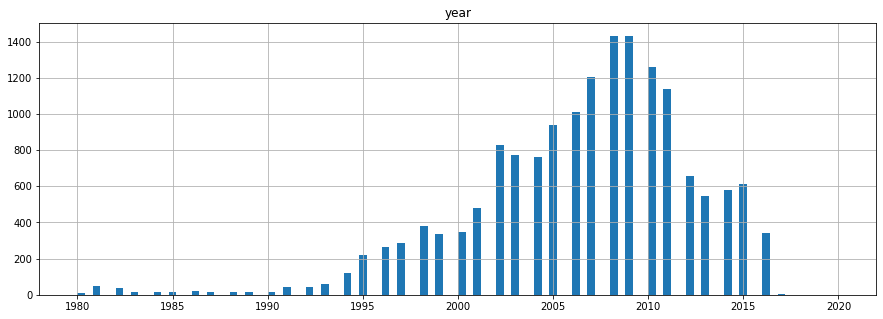

In [13]:
plt.figure(figsize=(15, 5))
plt.hist(df['year'], bins=100);
plt.grid(True)
plt.title('year');

**График сравнения объема продаж для первых 50 игр в рейтинге**

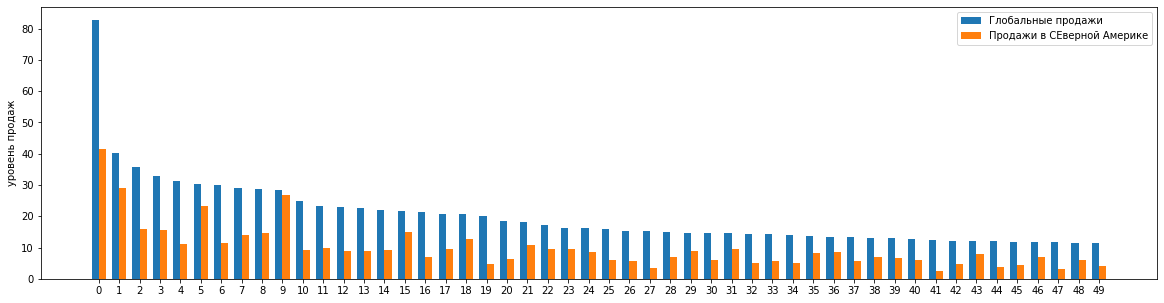

In [14]:
x = np.arange(len(df[:50]))   #выведем первые 50 строк
width = 0.35  

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(x - width/2, df['global_sales'][:50], width, label='Глобальные продажи')
rects2 = ax.bar(x + width/2, df['na_sales'][:50], width, label='Продажи в СЕверной Америке')

ax.set_ylabel('уровень продаж')
ax.set_xticks(x)
ax.legend()

**Посчитаем, сколько пропущенных значений**

In [15]:
df.isna().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

Как мы видим, большинство пропущенных значений - это год выпуска игры, а также сам издатель. Проанализируем зависимости.

In [16]:
df.groupby(df['year'].isnull()).mean()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
year,,,,,,,
False,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
True,8766.741697,NaN,0.219631,0.092288,0.024797,0.032251,0.369299


In [17]:
df.groupby(df['publisher'].isnull()).mean()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
publisher,,,,,,,
False,8294.197642,2006.405561,0.265079,0.146883,0.077998,0.048191,0.538426
True,10127.879310,2006.805556,0.147241,0.080690,0.016034,0.011552,0.256552


Возможные варианты решения: удалить строки с пустыми значениями, а также можно заполнить пустые значения значением, определяющим, что год выпуска неизвестен, например "0000", аналогично с издателем.

**Определить корреляцию между параметрами**

Чтобы посчитать взаимосвязи между переменными, можно использовать коэффициент корреляции Пирсона. Это мера интенсивности и направления линейной зависимости между двумя переменными. Значение +1 означает идеально линейную положительную зависимость, а -1 означает идеально линейную отрицательную зависимость.

In [18]:
correlations_data = df.corr()['year'].sort_values() #корреляция по году выпуска игры
correlations_data

jp_sales       -0.169316
na_sales       -0.091402
global_sales   -0.074735
eu_sales        0.006014
other_sales     0.041058
rank            0.178814
year            1.000000
Name: year, dtype: float64

In [20]:
correlations_data = df.corr()['global_sales'].sort_values() #корреляция по году выпуска игры
correlations_data

rank           -0.427407
year           -0.074735
jp_sales        0.611816
other_sales     0.748331
eu_sales        0.902836
na_sales        0.941047
global_sales    1.000000
Name: global_sales, dtype: float64

Можно сделать вывод, что столбец Year высоко коррелирует со столбцами rank, other_sales и eu_sales, а также никакой информации мы не сможем получить, сравнивая его со столбцами jp_sales, na_sales, global_sales.

Если рассмотреть атрибут global_sales, то здесь корреляция еще лучше проявляется с атрибутами связанными с продажами в разных регионах

**Построение графиков рассеивания**

Один из самых быстрых и самых простых способов определить наличие корреляции между двумя переменными состоит в том, чтобы рассмотреть их на графике рассеивания. Мы отфильтруем данные, выбрав только для жанра Role-Playing, и затем построим график продаваемости игр в подобном жанре по разному периоду времени(дате их выхода). Таким образом получим информацию о популярности данного жанра в разные периоды времени.

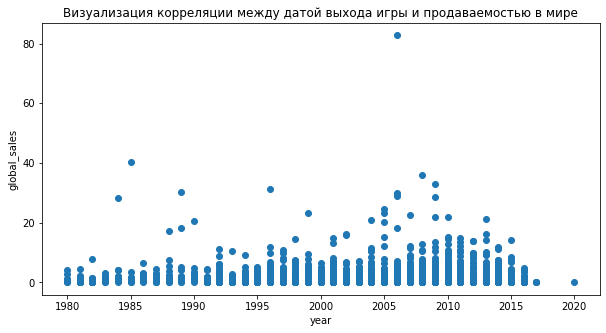

In [21]:
plt.figure(figsize=(10, 5))
plt.scatter(df['year'], df['global_sales']);
plt.xlabel('year');
plt.ylabel('global_sales');
plt.title('Визуализация корреляции между датой выхода игры и продаваемостью в мире');

**Матрица графиков рассеивания**

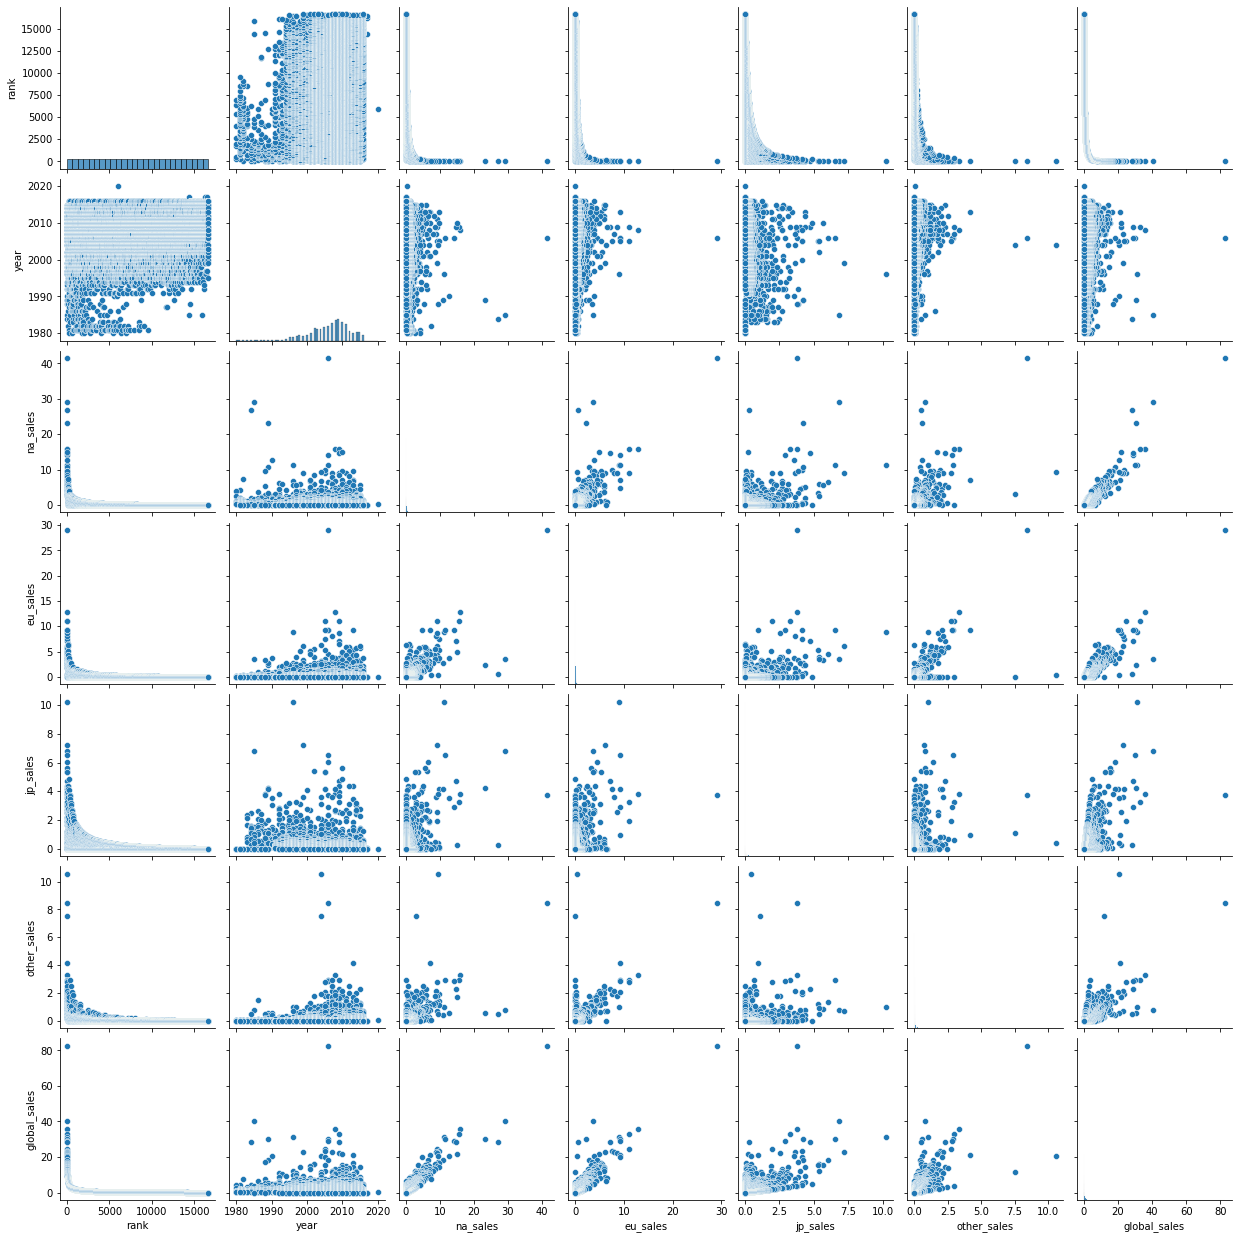

In [24]:
import seaborn as sns
sns.pairplot(df)

Отсутсвие корреляции можно наблюдать, например, между элементами "year" и "rank", а между элементами "global_sales" и "na_sales", а также "global_sales" и "eu_sales"  существует прямая корреляция, что нам говорит о том, что игры больше всего покупают в Америке и Европе. Также на графиках хорошо видны выбросы.